In [14]:
import pandas as pd

In [15]:
df= pd.read_csv (r"E:\Bus Quality\Bus Service Quality In Dhaka city_66.csv")

In [73]:
df.sample ()

,Bus Route,Gender,Age,Duration,Tangibility_Q1_P,Tangibility_Q1_E,Tangibility_Q2_P,Tangibility_Q2_E,Tangibility_Q3_P,Tangibility_Q3_E,...,Tangibility_Mean,Reliability_Mean,Responsiveness_Mean,Assurance_Mean,Empathy_Mean,Tangibility_Deviation,Reliability_Deviation,Responsiveness_Deviation,Assurance_Deviation,Empathy_Deviation
28,Gabtoli to Farmgate,2,25-39 Years,Over 2 years,2,4,1,5,2,4,...,1.8,2.0,1.25,1.25,1.4,46.0,26.666667,62.5,52.5,45.0


In [17]:
likert_map = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

servqual_cols = [col for col in df.columns if col.endswith("_P") or col.endswith('_E') ]
df[servqual_cols] = df[servqual_cols].applymap(lambda x: likert_map.get(x, None))

C:\Users\HP\AppData\Local\Temp\ipykernel_10236\2719567611.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[servqual_cols] = df[servqual_cols].applymap(lambda x: likert_map.get(x, None))


In [18]:
# df.isnull().sum()

In [19]:
# for col in df.columns:
#     if col.endswith("_P"):
#         base = col[:-2]  # removes "_P"
#         gap_col = f"{base}_Gap"
#         df[gap_col] = df[f"{base}_P"] - df[f"{base}_E"]

# dimensions = ["Tangibility", "Reliability", "Responsiveness", "Assurance", "Empathy"]

# dimension_gap_scores = {}
# for dim in dimensions:
#     gap_cols = [col for col in df.columns if col.startswith(dim) and col.endswith("_Gap")]
#     dimension_gap_scores[dim] = df[gap_cols].mean(axis=1)

In [20]:
# for dim, scores in dimension_gap_scores.items():
#     df[f"{dim}_Gap_Avg"] = scores

In [21]:
import pandas as pd
from scipy.stats import ttest_rel
items = [col[:-2] for col in df.columns if col.endswith("_P")]  # base names like Tangibility_Q1

results = []

for item in items:
    p = df[f"{item}_P"]
    e = df[f"{item}_E"]
    gap = p - e
    t_stat, p_val = ttest_rel(p, e)
# for item in items:
#     try:
#         p = df[f"{item}_P"]
#         e = df[f"{item}_E"]
#         t_stat, p_val = ttest_rel(p, e)
#         results.append((item, t_stat, p_val))
#     except Exception as ex:
#         print(f"Error with {item}: {ex}")
#         results.append((item, None, None))


    results.append({
        "Dimension": item.split("_")[0],
        "Code": item,
        "Perception Mean": round(p.mean(), 3),
        "Perception SD": round(p.std(), 3),
        "Expectation Mean": round(e.mean(), 3),
        "Expectation SD": round(e.std(), 3),
        "Gap Mean": round(gap.mean(), 3),
        "p-value": round(p_val, 4)
    })

In [23]:
t_test_df = pd.DataFrame(results)
print(t_test_df)
# t_test_df.to_csv('results_table.csv', index=False)

         Dimension               Code  Perception Mean  Perception SD  \
0      Tangibility     Tangibility_Q1            2.194          1.120   
1      Tangibility     Tangibility_Q2            2.176          1.131   
2      Tangibility     Tangibility_Q3            1.984          1.025   
3      Tangibility     Tangibility_Q4            1.860          1.025   
4      Tangibility     Tangibility_Q5            2.070          1.073   
5      Reliability     Reliability_Q1            2.548          1.355   
6      Reliability     Reliability_Q2            1.930          0.998   
7      Reliability     Reliability_Q3            2.078          1.107   
8      Reliability     Reliability_Q4            1.892          1.019   
9      Reliability     Reliability_Q5            2.224          1.099   
10     Reliability     Reliability_Q6            2.034          1.054   
11  Responsiveness  Responsiveness_Q4            2.180          1.145   
12  Responsiveness  Responsiveness_Q1            2.

In [68]:
t_test_df.to_csv('results_table.csv', index=False)

In [24]:
dimensions = {
    'Tangibility': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    'Reliability': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'],
    'Responsiveness': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Assurance': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Empathy': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
}

def get_items(df, dimension, suffix):
    return [f"{dimension}_{q}_{suffix}" for q in dimensions[dimension]]

def cronbach_alpha(df):
    item_vars = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return (n_items / (n_items - 1)) * (1 - item_vars.sum() / total_var)

results = []

for dim in dimensions.keys():
    # Perception
    p_items = get_items(df, dim, 'P')
    alpha_p = cronbach_alpha(df[p_items])
    
    # Expectation
    e_items = get_items(df, dim, 'E')
    alpha_e = cronbach_alpha(df[e_items])
    
    results.append({
        'Dimension': dim,
        'Cronbach Alpha (Perception)': round(alpha_p, 3),
        'Cronbach Alpha (Expectation)': round(alpha_e, 3)
    })

alpha_df = pd.DataFrame(results)
print(alpha_df)

        Dimension  Cronbach Alpha (Perception)  Cronbach Alpha (Expectation)
0     Tangibility                        0.843                         0.836
1     Reliability                        0.801                         0.790
2  Responsiveness                        0.840                         0.807
3       Assurance                        0.774                         0.729
4         Empathy                        0.847                         0.749


In [69]:
alpha_df.to_csv('Cronbach Alpha2.csv', index=False)

In [25]:
dimensions = {
    'Tangibility': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    'Reliability': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'],
    'Responsiveness': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Assurance': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Empathy': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
}
def get_items(dimension, suffix):
    return [f"{dimension}_{q}_{suffix}" for q in dimensions[dimension]]

results = []

for dim in dimensions:
    p_items = get_items(dim, 'P')
    e_items = get_items(dim, 'E')
    
    p_mean = df[p_items].mean(axis=1).mean()
    e_mean = df[e_items].mean(axis=1).mean()
    
    deviation = ((e_mean - p_mean) / e_mean) * 100
    
    results.append({
        'Dimension': dim,
        'Perception Mean': round(p_mean, 3),
        'Expectation Mean': round(e_mean, 3),
        'Percentage Deviation': round(deviation, 1),
        'LOS Category': 'LOS 2'  # Placeholder, can be automated
    })

los_df = pd.DataFrame(results)
print(los_df)

        Dimension  Perception Mean  Expectation Mean  Percentage Deviation  \
0     Tangibility            2.057             3.042                  32.4   
1     Reliability            2.118             3.065                  30.9   
2  Responsiveness            2.206             2.923                  24.5   
3       Assurance            2.108             2.746                  23.2   
4         Empathy            2.309             2.928                  21.1   

  LOS Category  
0        LOS 2  
1        LOS 2  
2        LOS 2  
3        LOS 2  
4        LOS 2  


In [70]:
los_df.to_csv('LOS.csv', index=False)

In [29]:
# Map satisfaction levels to numeric scores
satisfaction_map = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

df['Satisfaction'] = df['Satisfaction'].map(satisfaction_map)


import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


# Create new columns for mean perception scores
for dim, items in dimensions.items():
    p_cols = [f"{dim}_{q}_P" for q in items]
    df[f"{dim}_Mean"] = df[p_cols].mean(axis=1)

# Define independent variables
X = df[[f"{dim}_Mean" for dim in dimensions.keys()]]

# # Add constant for intercept
# X = sm.add_constant(X)

# Dependent variable
y = df['Satisfaction']

# Fit the model
# model = sm.OLS(y, X).fit()

model = OrderedModel(
    y,
    X,
    distr="logit"       # alternatives: "probit"
)
res = model.fit(method="bfgs")
print(res.summary())
pseudo_r2 = 1 - res.llf / res.llnull
print(f"McFadden's Pseudo R²: {pseudo_r2:.4f}")


# # Display summary
# print(model.summary())

Optimization terminated successfully.
         Current function value: 1.045897
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
                             OrderedModel Results                             
Dep. Variable:           Satisfaction   Log-Likelihood:                -522.95
Model:                   OrderedModel   AIC:                             1064.
Method:            Maximum Likelihood   BIC:                             1102.
Date:                Wed, 06 Aug 2025                                         
Time:                        00:55:55                                         
No. Observations:                 500                                         
Df Residuals:                     491                                         
Df Model:                           5                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [26]:
# # summary_df = model.summary2().tables[1]  # This gives you the coefficients table
# import pandas as pd

# # Get parameter names and values
# params = res.params
# conf_int = res.conf_int()
# summary_table = pd.DataFrame({
#     'coef': params,
#     'std err': res.bse,
#     'z': params / res.bse,
#     'p-value': res.pvalues,
#     'CI_lower': conf_int[0],
#     'CI_upper': conf_int[1]
# })

# # Save to CSV
# summary_table.to_csv('OrderedModel_Coefficients.csv', index=True)
# # summary_df.to_csv('Perception_Model1.csv', index=True)

In [42]:
for dim, items in dimensions.items():
    p_cols = [f"{dim}_{q}_P" for q in items]
    e_cols = [f"{dim}_{q}_E" for q in items]
    
    # Row-wise deviation for each item
    deviation_scores = (df[e_cols].values - df[p_cols].values) / df[e_cols].values * 100
    df[f"{dim}_Deviation"] = deviation_scores.mean(axis=1)

X = df[[f"{dim}_Deviation" for dim in dimensions.keys()]]
#X = sm.add_constant(X)
y = df['Satisfaction']
from sklearn.preprocessing import StandardScaler
sc= StandardScaler ()
X_trf= sc.fit_transform (X)

# model = sm.OLS(y, X).fit()
# print(model.summary())

model = OrderedModel(
    y,
    X_trf,
    distr="logit"       # alternatives: "probit"
)
res = model.fit(method="bfgs")
print(res.summary())
pseudo_r2 = 1 - res.llf / res.llnull
print(f"McFadden's Pseudo R²: {pseudo_r2:.4f}")

Optimization terminated successfully.
         Current function value: 1.256474
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                             OrderedModel Results                             
Dep. Variable:           Satisfaction   Log-Likelihood:                -628.24
Model:                   OrderedModel   AIC:                             1274.
Method:            Maximum Likelihood   BIC:                             1312.
Date:                Wed, 06 Aug 2025                                         
Time:                        01:02:14                                         
No. Observations:                 500                                         
Df Residuals:                     491                                         
Df Model:                           5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [142]:
# summary_df = model.summary2().tables[1]  # This gives you the coefficients table
# summary_df.to_csv('Expectation_Model.csv', index=True)

In [36]:
df.columns

Index(['Bus Route', 'Gender', 'Age', 'Duration', 'Tangibility_Q1_P',
       'Tangibility_Q1_E', 'Tangibility_Q2_P', 'Tangibility_Q2_E',
       'Tangibility_Q3_P', 'Tangibility_Q3_E', 'Tangibility_Q4_P',
       'Tangibility_Q4_E', 'Tangibility_Q5_P', 'Tangibility_Q5_E',
       'Reliability_Q1_P', 'Reliability_Q1_E', 'Reliability_Q2_P',
       'Reliability_Q2_E', 'Reliability_Q3_P', 'Reliability_Q3_E',
       'Reliability_Q4_P', 'Reliability_Q4_E', 'Reliability_Q5_P',
       'Reliability_Q5_E', 'Reliability_Q6_P', 'Reliability_Q6_E',
       'Responsiveness_Q4_P', 'Responsiveness_Q4_E', 'Responsiveness_Q1_P',
       'Responsiveness_Q1_E', 'Responsiveness_Q2_P', 'Responsiveness_Q2_E',
       'Responsiveness_Q3_P', 'Responsiveness_Q3_E', 'Assurance_Q1_P',
       'Assurance_Q1_E', 'Assurance_Q2_P', 'Assurance_Q2_E', 'Assurance_Q3_P',
       'Assurance_Q3_E', 'Assurance_Q4_P', 'Assurance_Q4_E', 'Empathy_Q1_P',
       'Empathy_Q1_E', 'Empathy_Q2_P', 'Empathy_Q2_E', 'Empathy_Q3_P',
       'Empa

In [37]:
df2= df.drop (columns=[ 'Tangibility_Q1_P',
       'Tangibility_Q1_E', 'Tangibility_Q2_P', 'Tangibility_Q2_E',
       'Tangibility_Q3_P', 'Tangibility_Q3_E', 'Tangibility_Q4_P',
       'Tangibility_Q4_E', 'Tangibility_Q5_P', 'Tangibility_Q5_E',
       'Reliability_Q1_P', 'Reliability_Q1_E', 'Reliability_Q2_P',
       'Reliability_Q2_E', 'Reliability_Q3_P', 'Reliability_Q3_E',
       'Reliability_Q4_P', 'Reliability_Q4_E', 'Reliability_Q5_P',
       'Reliability_Q5_E', 'Reliability_Q6_P', 'Reliability_Q6_E',
       'Responsiveness_Q4_P', 'Responsiveness_Q4_E', 'Responsiveness_Q1_P',
       'Responsiveness_Q1_E', 'Responsiveness_Q2_P', 'Responsiveness_Q2_E',
       'Responsiveness_Q3_P', 'Responsiveness_Q3_E', 'Assurance_Q1_P',
       'Assurance_Q1_E', 'Assurance_Q2_P', 'Assurance_Q2_E', 'Assurance_Q3_P',
       'Assurance_Q3_E', 'Assurance_Q4_P', 'Assurance_Q4_E', 'Empathy_Q1_P',
       'Empathy_Q1_E', 'Empathy_Q2_P', 'Empathy_Q2_E', 'Empathy_Q3_P',
       'Empathy_Q3_E', 'Empathy_Q4_P', 'Empathy_Q4_E', 'Empathy_Q5_P',
       'Empathy_Q5_E'])#,'Gap_Mean',
       #'Age_Label', 'Route_Code'])

# Rename columns by removing '_Mean' suffix
df2.rename(columns=lambda col: col.replace('_Mean', '') if '_Mean' in col else col, inplace=True)
df2.columns

Index(['Bus Route', 'Gender', 'Age', 'Duration', 'Satisfaction', 'Tangibility',
       'Reliability', 'Responsiveness', 'Assurance', 'Empathy',
       'Tangibility_Deviation', 'Reliability_Deviation',
       'Responsiveness_Deviation', 'Assurance_Deviation', 'Empathy_Deviation'],
      dtype='object')

In [57]:
df2.shape

(500, 15)

In [58]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

age_order = ['10 to 24 Years', '25-39 Years', '40 to 59 Year', 'more than 60 Years']

duration_order = ['Under 6 months', 'From 6 months to 1 year', 'From 1 year to 2 years','Over 2 years']

ordinal_enc = OrdinalEncoder(categories=[age_order, duration_order])
df2[['Age', 'Duration']] = ordinal_enc.fit_transform(df[['Age', 'Duration']])

# 🎯 Label encode nominal categorical column
le = LabelEncoder()
df2['Bus Route'] = le.fit_transform(df['Bus Route'])

X= df2.drop(columns=['Satisfaction'])
y= df2['Satisfaction']
df2.shape

(500, 15)

In [62]:
%%time
X_train, X_test, y_train, y_test= train_test_split (X,y, test_size=.8, stratify=y, random_state=42)
y_train_adj= y_train - 1
y_test_adj= y_test - 1
X_train_trf= sc.fit_transform (X_train)
X_test_trf= sc.transform (X_test)
print ('='*40)
print ('XGBOOST Model Traning Started')
from sklearn.utils.class_weight import compute_sample_weight

param_grid ={
    'learning_rate': [0.01,0.1,0.3],
    'max_depth': [5,10,20],
    'n_estimators':[25,50,150],
    'reg_alpha': [0.01,0.1,1],
    'reg_lamda': [1,5]
}
sample_weights = compute_sample_weight (class_weight = 'balanced', y= y_train_adj)
model= XGBClassifier ( 
    objective='mutli:softmax',
    num_class=5,
    tree_method= 'hist',
    n_jobs=-1,
    eval_metrics='mlogloss', random_state=42
)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
grid = GridSearchCV (model, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit (X_train_trf, y_train_adj, sample_weight = sample_weights)
print ('Best Parameters',grid.best_params_)
print ('Best Accuracy',grid.best_score_)
print ('='*40)
print ('Task Done')
    

XGBOOST Model Traning Started
Fitting 10 folds for each of 162 candidates, totalling 1620 fits


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 150, 'reg_alpha': 1, 'reg_lamda': 1}
Best Accuracy 0.5599999999999998
Task Done
CPU times: total: 3.83 s
Wall time: 13.2 s


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:09:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "reg_lamda" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
print ('='*40)
print ('XGBOOST Training Started')
xgb= grid.best_estimator_
xgb.fit (X_train_trf, y_train_adj)
y_pred= xgb.predict (X_test_trf)
from sklearn.metrics import precision_score, f1_score, recall_score
accuracy = accuracy_score(y_test_adj, y_pred)
precision = precision_score(y_test_adj, y_pred, average= 'weighted')   # or 'micro', 'weighted'
recall = recall_score(y_test_adj, y_pred, average= 'weighted')
f1 = f1_score(y_test_adj, y_pred, average= 'weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print ('='*40)
print ('Task Done')

XGBOOST Training Started


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:09:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "reg_lamda" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.4725
Precision: 0.4598
Recall: 0.4725
F1 Score: 0.4657
Task Done


In [67]:
print ('='*40)
print ('Random Forest Model Traning Started')
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(class_weight= 'balanced', n_jobs=-1, random_state=42)
param_grid = {
    'n_estimators': [25,50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [ 5,10,15],
    'bootstrap':[True, False]
}
grid= GridSearchCV (RandomForestClassifier (class_weight= 'balanced', n_jobs=-1), param_grid, cv=10, scoring='accuracy',verbose=1, n_jobs=-1)
grid.fit (X_train_trf, y_train_adj)
print ('Best_Parameters', grid.best_params_)
print ('Best Accuracy', grid.best_score_)
print ('='*40)
print ('Task Done')

print ('='*40)
print (' Random Forest Training Started')
rf= grid.best_estimator_
rf.fit (X_train_trf, y_train_adj)
y_pred= rf.predict (X_test_trf)
from sklearn.metrics import precision_score, f1_score, recall_score
accuracy = accuracy_score(y_test_adj, y_pred)
precision = precision_score(y_test_adj, y_pred, average= 'weighted')   # or 'micro', 'weighted'
recall = recall_score(y_test_adj, y_pred, average= 'weighted')
f1 = f1_score(y_test_adj, y_pred, average= 'weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print ('='*40)
print ('Task Done')

Random Forest Model Traning Started
Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Best_Parameters {'bootstrap': False, 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy 0.53
Task Done
 Random Forest Training Started
Accuracy: 0.4925
Precision: 0.4888
Recall: 0.4925
F1 Score: 0.4895
Task Done


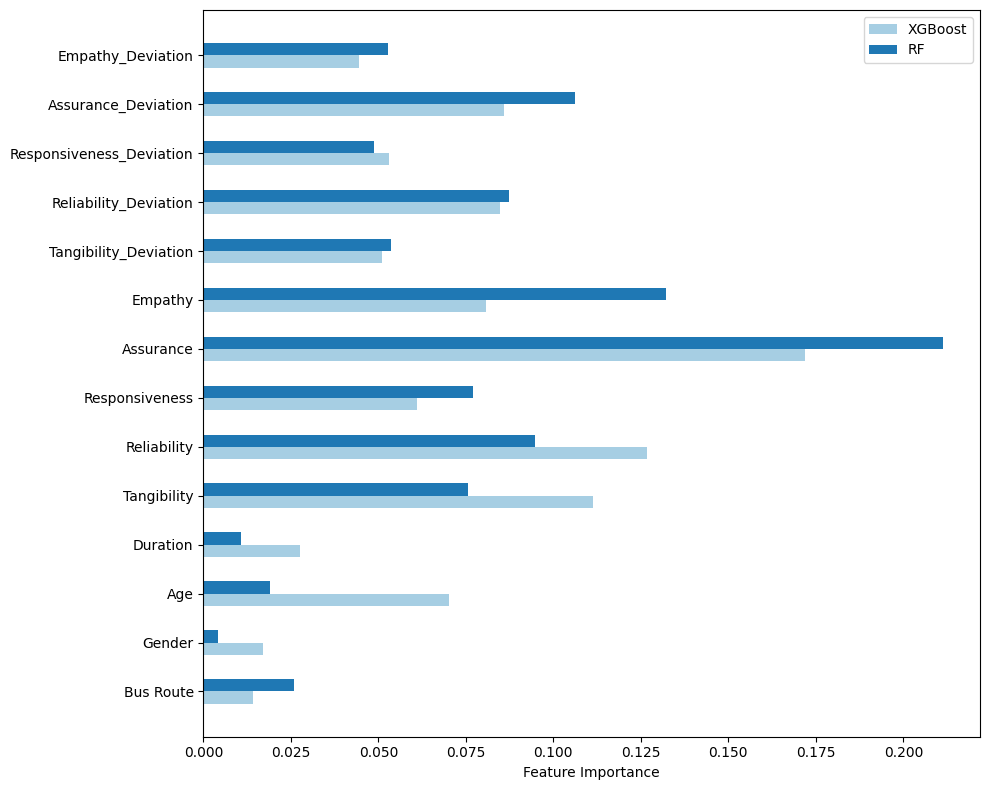

In [71]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Feature importance from XGBoost
# feature_names = X_train.columns
# importance = rf.feature_importances_

# # Plot
# fig, ax = plt.subplots(figsize=(8, 6))
# x = np.arange(len(feature_names))
# ax.barh(x, importance, color='steelblue')

# ax.set_yticks(x)
# ax.set_yticklabels(feature_names)
# ax.set_xlabel('Feature Importance')
# plt.tight_layout()
# plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
# plt.show()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get feature importances from each model
feature_names = X_train.columns
importances = {
    'XGBoost': xgb.feature_importances_,
    'RF': rf.feature_importances_,
}

# Use seaborn color palette
palette = sns.color_palette("Paired", n_colors=len(importances))  # You can try "Set1", "Paired", "Dark2", etc.
model_names = list(importances.keys())

# Create comparison plot
fig, ax = plt.subplots(figsize=(10, 8))
x = np.arange(len(feature_names))
width = 0.25

for i, (name, importance) in enumerate(importances.items()):
    ax.barh(x + i*width, importance, width, label=name, color=palette[i])

ax.set_yticks(x + width / 2)
ax.set_yticklabels(feature_names)
ax.set_xlabel('Feature Importance')
ax.legend()
plt.tight_layout()
plt.savefig('feature_importance_both1.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
df.columns

Index(['Bus Route', 'Gender', 'Age', 'Duration', 'Tangibility_Q1_P',
       'Tangibility_Q1_E', 'Tangibility_Q2_P', 'Tangibility_Q2_E',
       'Tangibility_Q3_P', 'Tangibility_Q3_E', 'Tangibility_Q4_P',
       'Tangibility_Q4_E', 'Tangibility_Q5_P', 'Tangibility_Q5_E',
       'Reliability_Q1_P', 'Reliability_Q1_E', 'Reliability_Q2_P',
       'Reliability_Q2_E', 'Reliability_Q3_P', 'Reliability_Q3_E',
       'Reliability_Q4_P', 'Reliability_Q4_E', 'Reliability_Q5_P',
       'Reliability_Q5_E', 'Reliability_Q6_P', 'Reliability_Q6_E',
       'Responsiveness_Q4_P', 'Responsiveness_Q4_E', 'Responsiveness_Q1_P',
       'Responsiveness_Q1_E', 'Responsiveness_Q2_P', 'Responsiveness_Q2_E',
       'Responsiveness_Q3_P', 'Responsiveness_Q3_E', 'Assurance_Q1_P',
       'Assurance_Q1_E', 'Assurance_Q2_P', 'Assurance_Q2_E', 'Assurance_Q3_P',
       'Assurance_Q3_E', 'Assurance_Q4_P', 'Assurance_Q4_E', 'Empathy_Q1_P',
       'Empathy_Q1_E', 'Empathy_Q2_P', 'Empathy_Q2_E', 'Empathy_Q3_P',
       'Empa

C:\Users\HP\AppData\Local\Temp\ipykernel_9764\3919450201.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Route_Code', y='Gap_Mean', data=df, palette='Blues')


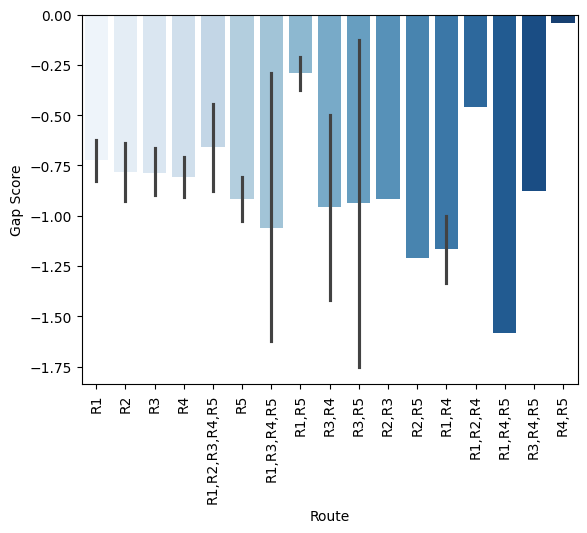

In [36]:
road_codes = {
    'Abdullahpur to Farmgate': 'R1',
    'Jatrabari to Abdullahpur': 'R2',
    'Motijheel to Farmgate': 'R3',
    'Mirpur-12 to Farmgate': 'R4',
    'Gabtoli to Farmgate': 'R5'
}
def encode_multiple_roads(route_str):
    roads = [r.strip() for r in route_str.split(',')]
    codes = [road_codes.get(r, r) for r in roads]
    return ','.join(sorted(set(codes)))  # sorted & deduplicated
df['Route_Code'] = df['Bus Route'].apply(encode_multiple_roads)


sns.barplot(x='Route_Code', y='Gap_Mean', data=df, palette='Blues')
plt.xlabel('Route')
plt.ylabel('Gap Score')
plt.xticks(rotation=90) 
plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')# or use shorter route codes

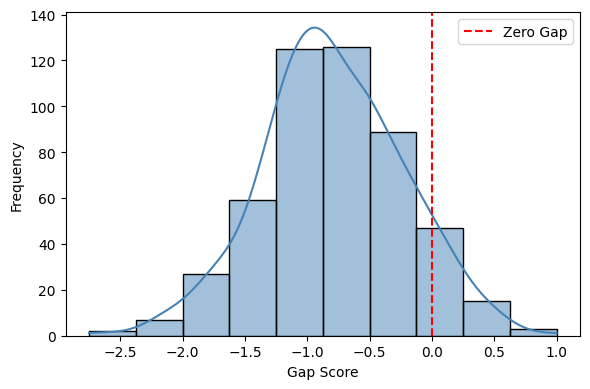

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

items = [col[:-2] for col in df.columns if col.endswith("_P")]
gap_means = []

for item in items:
    try:
        p = df[f"{item}_P"]
        e = df[f"{item}_E"]
        gap = p - e
        gap_means.append({
            "Dimension": item.split("_")[0],
            "Code": item,
            "Gap_Mean": round(gap.mean(), 3)
        })
    except Exception as ex:
        print(f"Error with {item}: {ex}")

# Convert results list to DataFrame

# Plot histogram of Gap Means
plt.figure(figsize=(6, 4))
sns.histplot(df['Gap_Mean'], bins=10, kde=True, color='steelblue')
plt.grid (False)
# plt.title('Distribution of Gap Scores Across SERVQUAL Items')
plt.xlabel('Gap Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Zero Gap')
plt.legend()
plt.tight_layout()
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9764\3811050667.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age_Label', y='Gap_Mean', data=df, palette='Blues')


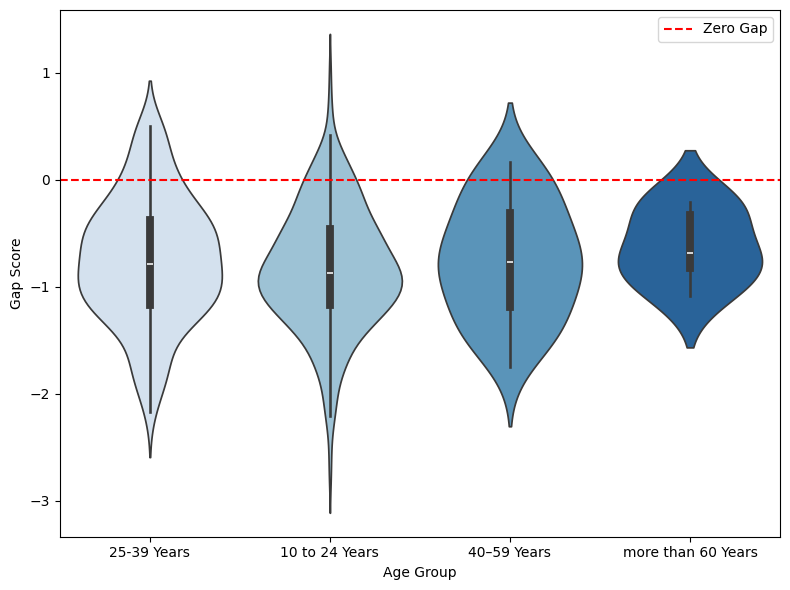

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define SERVQUAL dimensions and items
dimensions = {
    'Tangibility': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    'Reliability': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'],
    'Responsiveness': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Assurance': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Empathy': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
}

def get_items(dimension, suffix):
    return [f"{dimension}_{q}_{suffix}" for q in dimensions[dimension]]

# Step 1: Collect all perception and expectation items
all_p_items = []
all_e_items = []

for dim in dimensions:
    all_p_items.extend(get_items(dim, 'P'))
    all_e_items.extend(get_items(dim, 'E'))

# Step 2: Calculate respondent-level gap scores
df['Gap_Mean'] = df[all_p_items].mean(axis=1) - df[all_e_items].mean(axis=1)

# # Step 3: Map age codes to readable labels
# age_labels = {
#     0: '10–24',
#     1: '25–39',
#     2: '40–59',
#     3: '60+'
# } 
# df['Age_Label'] = df['Age'].map(age_labels)

df['Age_Label'] = df['Age'].replace({
    '10 to 24 Year': '10–24 Years',
    '25 to 39 Year': '25–39 Years',
    '40 to 59 Year': '40–59 Years',
    'more than 60 Year': '60+ Years'
})

# Step 4: Plot violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Age_Label', y='Gap_Mean', data=df, palette='Blues')

# plt.title('Distribution of Gap Scores Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Gap Score')
plt.axhline(0, color='red', linestyle='--', label='Zero Gap')
plt.legend()
plt.tight_layout()
plt.savefig('violin_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [132]:
df['Age'].value_counts()

Age
10 to 24 Years        305
25-39 Years           161
40 to 59 Year          28
more than 60 Years      6
Name: count, dtype: int64

In [75]:
selected_df = df[['Age', 'Gender', 'Duration']]


def summarize_column(df, column_name):
    counts = df[column_name].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'Characteristic': column_name,
        'Category': counts.index,
        'Percentage of total responses (%)': counts.round(2)
    })

# Generate summaries
age_summary = summarize_column(selected_df, 'Age')
gender_summary = summarize_column(selected_df, 'Gender')
duration_summary = summarize_column(selected_df, 'Duration')

# Combine all
summary_table = pd.concat([gender_summary, age_summary, duration_summary], ignore_index=True)

summary_table.to_csv('socioeconomic_summary.csv', index=False)
print(summary_table.to_string(index=False))

Characteristic                Category  Percentage of total responses (%)
        Gender                       1                               80.8
        Gender                       2                               19.2
           Age          10 to 24 Years                               61.0
           Age             25-39 Years                               32.2
           Age           40 to 59 Year                                5.6
           Age      more than 60 Years                                1.2
      Duration            Over 2 years                               76.0
      Duration  From 1 year to 2 years                               10.4
      Duration          Under 6 months                                8.8
      Duration From 6 months to 1 year                                4.8
